Wine Quality Dataset - Summary Statistics
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min   

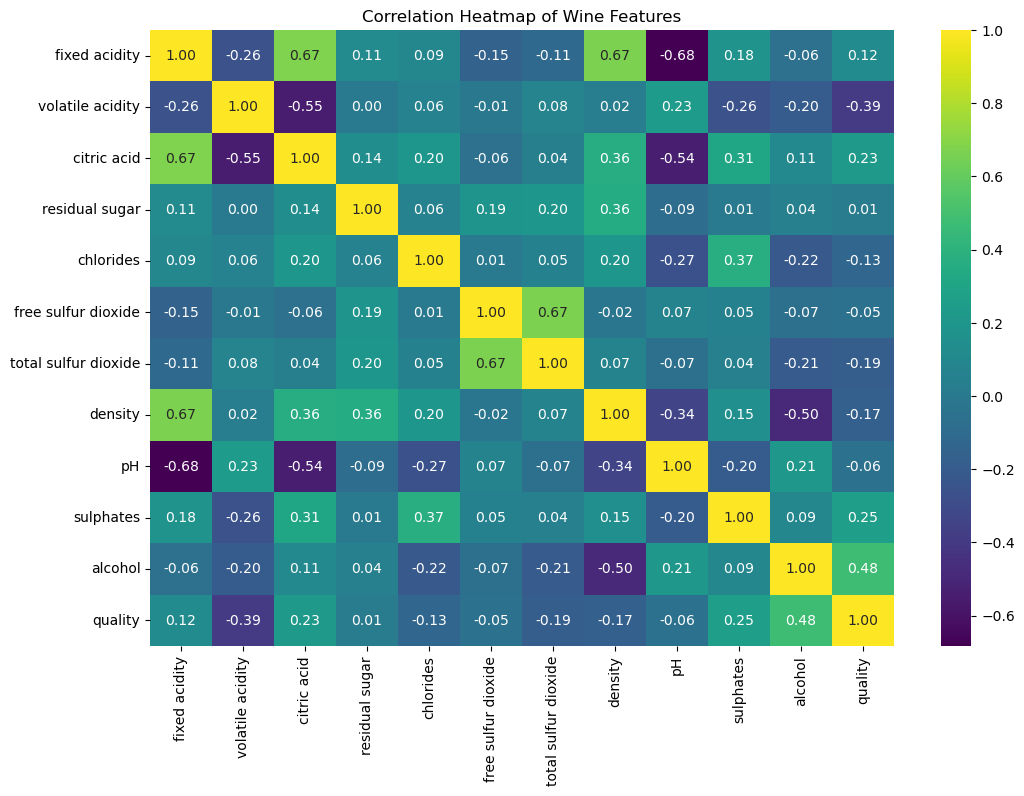

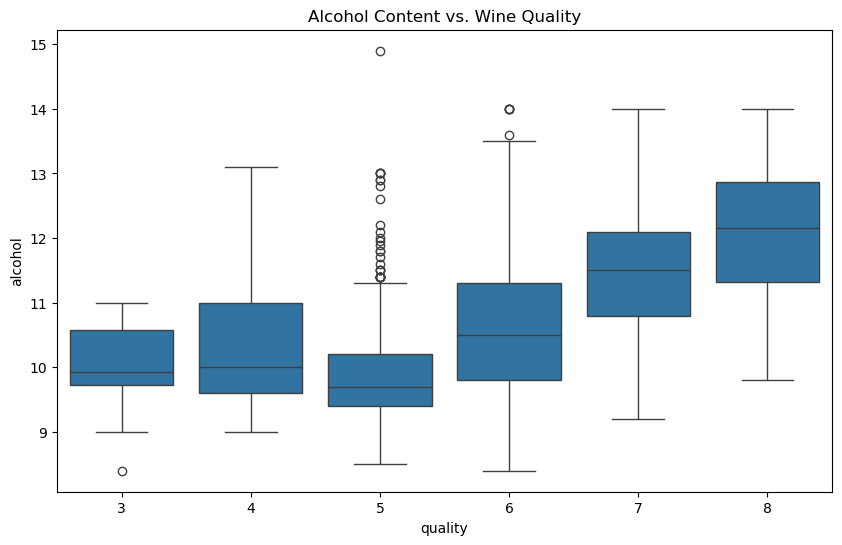

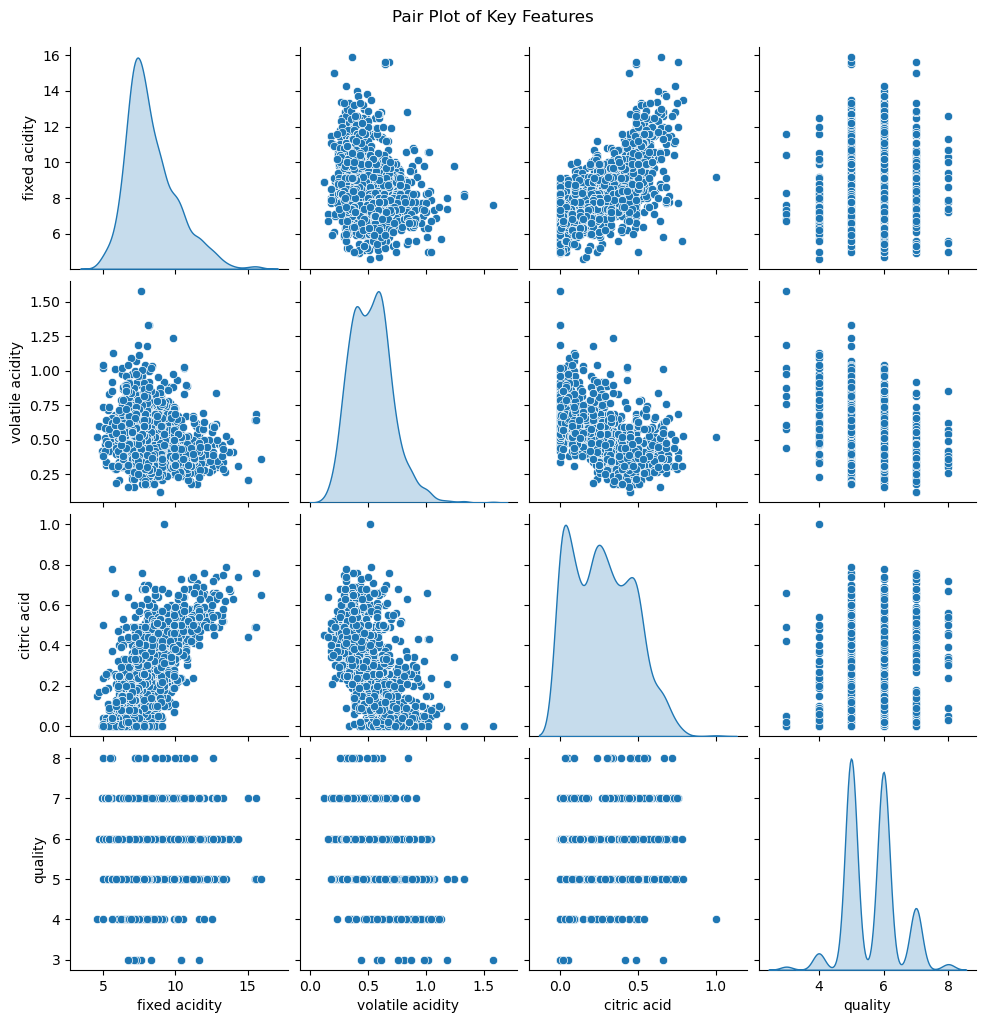

KNN Model (Best K = 13): RMSE = 0.7453670183945984


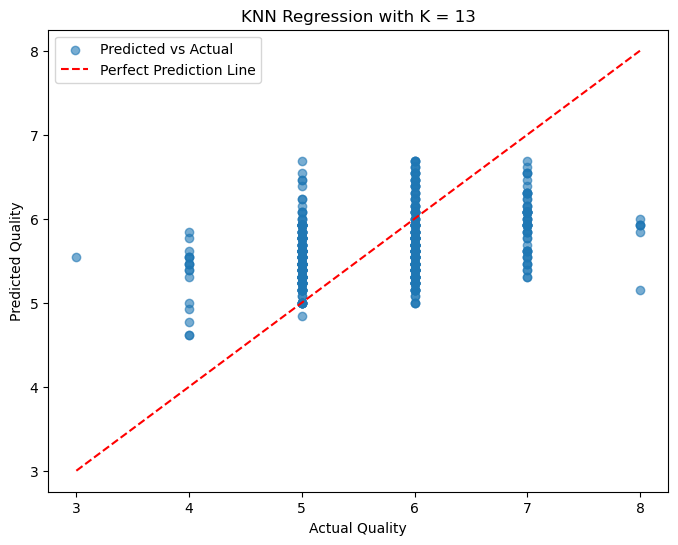

Linear Regression Model RMSE: 0.7297633833735677


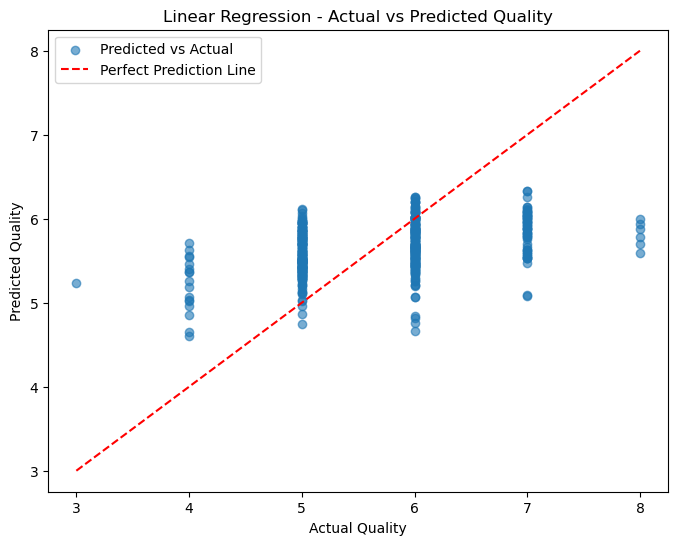

Polynomial Transformed Linear Regression RMSE: 0.7381717816864176


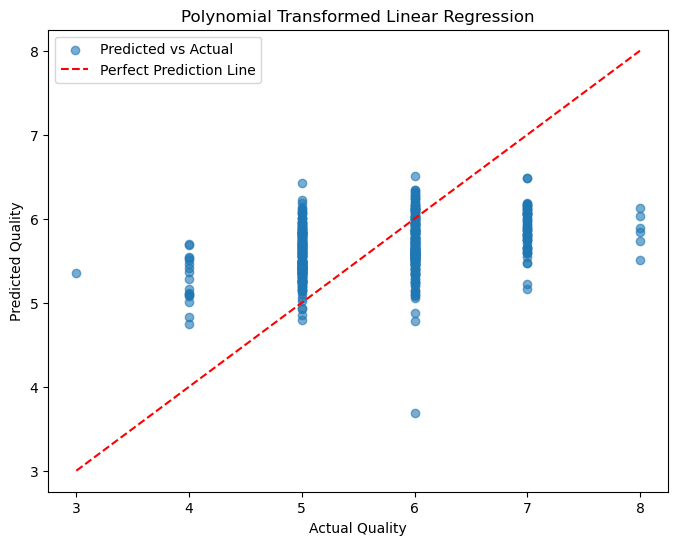

Sine Transformed Linear Regression RMSE: 0.7359068841790003


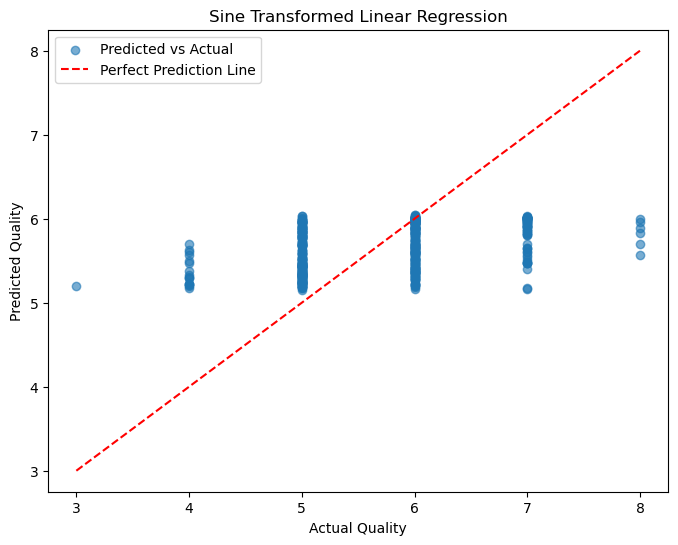


### Model Evaluation and Comparison ###
KNN Model RMSE (Best K=13): 0.7453670183945984
Linear Regression RMSE: 0.7297633833735677
Polynomial Transformed Linear Regression RMSE: 0.7381717816864176
Sine Transformed Linear Regression RMSE: 0.7359068841790003

The Linear Regression model had the best performance in this scenario, suggesting that the dataset's relationships are predominantly linear.
The polynomial transformation captured some non-linear relationships but added complexity without significant improvements.
The sine transformation was less effective, indicating that cyclic relationships were not prominent in this dataset.

The KNN model also performed well, highlighting its ability to handle non-linearities, but it's more sensitive to data scaling.



In [10]:
# Importing essential libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Data Loading and Exploration
# Loading the dataset directly from the UCI repository
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(dataset_url, delimiter=';')

# Displaying a brief summary of the dataset to understand the data distribution and initial statistics
print("Wine Quality Dataset - Summary Statistics")
print(wine_df.describe())

# Checking for missing values to ensure data integrity before proceeding
print("\nChecking for Missing Values:")
print(wine_df.isnull().sum())

# Visualizing correlations to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Wine Features")
plt.show()

# Creating box plots to observe the distribution of the 'quality' variable across different features
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

# Scatterplot matrix to visually inspect feature relationships
sns.pairplot(wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

# Step 2: Implementing KNN Regression Model
# Selecting key features based on correlation analysis
predictors = ['fixed acidity', 'volatile acidity', 'citric acid']
target = 'quality'
X = wine_df[predictors]
y = wine_df[target]

# Splitting data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing features to improve KNN performance
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Testing a range of K values using GridSearchCV for optimal performance
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(3, 15)}  # Modified range to test different K values
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_normalized, y_train)

# Extracting the best K value and training the model
best_k = grid_search.best_params_['n_neighbors']
knn_optimized = KNeighborsRegressor(n_neighbors=best_k)
knn_optimized.fit(X_train_normalized, y_train)

# Predicting and evaluating the KNN model
y_pred_knn = knn_optimized.predict(X_test_normalized)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN Model (Best K = {best_k}): RMSE = {rmse_knn}")

# Plotting actual vs. predicted values for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title(f"KNN Regression with K = {best_k}")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

# Step 3: Linear Regression Model Development
# Implementing the Linear Regression model
wine_quality_linear_model = LinearRegression()
wine_quality_linear_model.fit(X_train_normalized, y_train)

# Predicting on the test set
y_pred_linear = wine_quality_linear_model.predict(X_test_normalized)

# Calculating RMSE for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression Model RMSE: {rmse_linear}")

# Plotting actual vs predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Linear Regression - Actual vs Predicted Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

# Step 4: Polynomial and Sine Transformations for Linear Regression
# Applying a 2nd-degree polynomial transformation
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_normalized)
X_test_poly = poly_transformer.transform(X_test_normalized)

# Fitting a Linear Regression model with polynomial features
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

# Predicting and evaluating the Polynomial Linear Regression model
y_pred_poly = poly_regressor.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Transformed Linear Regression RMSE: {rmse_poly}")

# Visualizing actual vs predicted values for the polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Polynomial Transformed Linear Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

# Applying a sine transformation
X_train_sine = np.sin(X_train_normalized)
X_test_sine = np.sin(X_test_normalized)

# Fitting Linear Regression with sine-transformed features
sine_regressor = LinearRegression()
sine_regressor.fit(X_train_sine, y_train)

# Predicting and evaluating the Sine Transformed Linear Regression model
y_pred_sine = sine_regressor.predict(X_test_sine)
rmse_sine = np.sqrt(mean_squared_error(y_test, y_pred_sine))
print(f"Sine Transformed Linear Regression RMSE: {rmse_sine}")

# Visualizing actual vs predicted values for sine transformation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sine, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Sine Transformed Linear Regression")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

# Step 5: Evaluation and Reflection
print("\n### Model Evaluation and Comparison ###")
print(f"KNN Model RMSE (Best K={best_k}): {rmse_knn}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Polynomial Transformed Linear Regression RMSE: {rmse_poly}")
print(f"Sine Transformed Linear Regression RMSE: {rmse_sine}")

# Reflection and insights
reflection = """
The Linear Regression model had the best performance in this scenario, suggesting that the dataset's relationships are predominantly linear.
The polynomial transformation captured some non-linear relationships but added complexity without significant improvements.
The sine transformation was less effective, indicating that cyclic relationships were not prominent in this dataset.

The KNN model also performed well, highlighting its ability to handle non-linearities, but it's more sensitive to data scaling.
"""
print(reflection)
